# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Header style](#header_style)
    * [2.2 Missing values](#missing_values)
    * [2.3 Duplicates](#duplicates)
    * [2.4 Outliers](#outliers)
* [Stage 3. Visualizations](#visualizations)
    * [3.1 Histograms](#histograms)
    * [3.2 Scatterplots](#scatterplots)
* [Conclusion](#conclusion)

## Introduction <a id='intro'></a>
In this notebook, we will perform some basic exploratory analysis of the dataset and create a couple of histograms and scatterplots using plotly-express library.


### Goal: 
Create 2 histograms a 2 scatterplots that I can later copy to the webb-app.

### Stages 
Data on car advertisment is stored in the file `web_app_project\vehicles_us.csv`. There is no information about the quality of the data, so I will need to explore it before testing the hypotheses. 

First, I'll evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, I will try to account for the most critical problems.
 
My project will consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Creating Visualizations
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>


In [142]:
import pandas as pd # importing pandas
import numpy as np # importing numpy
import plotly.express as px #importing the library

In [143]:
df = pd.read_csv(r'C:\Users\dmitr\web_app_project\project\vehicles_us.csv') # reading the file and storing it to df

In [144]:
df.head(10) # obtaining the first 10 rows from the df table

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

In [145]:
df.info()# obtaining general information about the data in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The table contains 13 columns. They store different data types: object(7), float(4), and integer(2).

- 'price' - The price of the car listed in the advertisement.
- 'model_year' - The year the car model was released.
- 'model' - The specific model of the car.
- 'condition' - The current condition of the car.
- 'cylinders' - The number of cylinders in the car's engine.
- 'fuel' - The type of fuel used by the car.
- 'odometer' - The mileage or distance traveled by the car.
- 'transmission' - The type of transmission in the car.
- 'type' - The body type or style of the car.
- 'paint_color' - The color of the car's exterior paint.
- 'is_4wd' - Indicates whether the car is four-wheel drive (4WD) or not.
- 'date_posted' - The date when the advertisement for the car was posted.
- 'days_listed' - The number of days the advertisement was listed before the car was sold or removed.


There are a few issues present in the dataset:

1. Missing Values: There are missing values present in several columns such as 'model_year', 'odometer', 'paint_color', 'is_4wd', and 'cylinders'. 
2. Data Types: Some columns like 'model_year' and 'odometer' should ideally be integers rather than floats. Similarly, the 'date_posted' column should be of datetime type instead of object and the 'is_4wd' should be bool.
3. Inconsistent Data: The 'condition' column contains values like 'like new', 'fair', 'excellent', etc. The 'is_4wd' contains values of '1.0' for 'yes' and 'NaN' for 'No'. These values might need to be standardized for better analysis.
4. Outliers: Outliers might be present in numerical columns like 'price', 'odometer'. These outliers could affect the analysis or modeling and might need to be addressed.

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

### Header style <a id='header_style'></a>

Checking if the columns names are appropriate:

In [146]:
df.columns# the list of column names in the df table

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

Yes, we can move on

### Missing values <a id='missing_values'></a>

In [147]:
df.isna().sum() #finding the number of missing values


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [148]:
# Fill missing values in 'model_year' based on the median value within each 'model' group
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

# Fill missing values in 'odometer' based on the median value within each group of 'model_year'
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))

# Fill missing values in 'cylinders' with the median value within each 'model' group
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

# Fill missing values in 'is_4wd' with 0
df['is_4wd'].fillna(0, inplace=True)

# Fill missing values in 'paint_color' with 'unknown'
df['paint_color'].fillna('unknown', inplace=True)

# Standardize 'condition' column values
condition_mapping = {
    'like new': 'good',
    'new': 'excellent',
    'fair': 'good',
    'salvage': 'poor'
}
df['condition'] = df['condition'].map(condition_mapping).fillna(df['condition'])

# Converting 'is_4wd' column to boolean
df['is_4wd'] = df['is_4wd'].astype(bool)

# Converting 'model_year' and 'odometer' columns to integers
df['model_year'] = df['model_year'].astype(int)

# Checking if there are any missing values left
print(df.isna().sum())

# Displaying the first few rows of the dataframe after processing
df.head(50)


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


price  model_year                              model  condition  \
0    9400        2011                             bmw x5       good   
1   25500        2011                         ford f-150       good   
2    5500        2013                     hyundai sonata       good   
3    1500        2003                         ford f-150       good   
4   14900        2017                       chrysler 200  excellent   
5   14990        2014                       chrysler 300  excellent   
6   12990        2015                       toyota camry  excellent   
7   15990        2013                        honda pilot  excellent   
8   11500        2012                        kia sorento  excellent   
9    9200        2008                        honda pilot  excellent   
10  19500        2011           chevrolet silverado 1500  excellent   
11   8990        2012                       honda accord  excellent   
12  18990        2012                           ram 1500  excellent   
13  16500        2018                     hyundai sonata  excellent   
14  12990        2009                          gmc yukon  excellent   
15  17990        2013                           ram 1500  excellent   
16  14990        2010                           ram 1500  excellent   
17  13990        2014                      jeep cherokee  excellent   
18  12500        2013                 chevrolet traverse  excellent   
19  13990        2018                    hyundai elantra  excellent   
20   6990        2009                    chevrolet tahoe  excellent   
21   5250        2007                        toyota rav4       good   
22   7500        2004                chevrolet silverado       good   
23   7500        2004                      jeep wrangler       good   
24   3950        2009                       chrysler 200  excellent   
25  11499        2017                   chevrolet malibu       good   
26   8499        2014                     ford fusion se       good   
27  12999        2015                   chevrolet impala       good   
28  29800        2012                 chevrolet corvette  excellent   
29   5495        2010                   chevrolet impala  excellent   
30   5000        2009                       jeep liberty       good   
31  11999        2017                    toyota camry le  excellent   
32   9499        2015                      nissan altima       good   
33   3890        2011                     subaru outback  excellent   
34   9500        2008                  toyota highlander       good   
35  14999        2015                      dodge charger       good   
36  10499        2013                       chrysler 300       good   
37   7500        2005                      toyota tacoma       good   
38   7999        2015                       chrysler 200       good   
39   8000        2009                         ford f-150       good   
40  11499        2017                  chevrolet equinox       good   
41  11995        2017                       nissan rogue       good   
42  34900        2013  mercedes-benz benze sprinter 2500  excellent   
43   5100        2008                         honda cr-v  excellent   
44   4500        2004                jeep grand cherokee       good   
45   2400        2001                       toyota camry       good   
46  11200        2015                      dodge charger  excellent   
47  12500        2008                     toyota 4runner       good   
48   9500        2014                         ford focus  excellent   
49   3200        2006                        honda civic  excellent   

    cylinders    fuel  odometer transmission    type paint_color  is_4wd  \
0         6.0     gas  145000.0    automatic     SUV     unknown    True   
1         6.0     gas   88705.0    automatic  pickup       white    True   
2         4.0     gas  110000.0    automatic   sedan         red   False   
3         8.0     gas  161397.0    automatic  pickup     unknown   False   
4 

In [149]:
# Fill missing values in 'odometer' with the median value within each 'model' group
df['odometer'] = df['odometer'].fillna(df.groupby('condition')['odometer'].transform('median'))
# Converting 'odometer' column to integer
df['odometer'] = df['odometer'].astype(int)

# Checking if there are any missing values left
print(df.isna().sum())
# Checking results
df.head(50)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


price  model_year                              model  condition  \
0    9400        2011                             bmw x5       good   
1   25500        2011                         ford f-150       good   
2    5500        2013                     hyundai sonata       good   
3    1500        2003                         ford f-150       good   
4   14900        2017                       chrysler 200  excellent   
5   14990        2014                       chrysler 300  excellent   
6   12990        2015                       toyota camry  excellent   
7   15990        2013                        honda pilot  excellent   
8   11500        2012                        kia sorento  excellent   
9    9200        2008                        honda pilot  excellent   
10  19500        2011           chevrolet silverado 1500  excellent   
11   8990        2012                       honda accord  excellent   
12  18990        2012                           ram 1500  excellent   
13  16500        2018                     hyundai sonata  excellent   
14  12990        2009                          gmc yukon  excellent   
15  17990        2013                           ram 1500  excellent   
16  14990        2010                           ram 1500  excellent   
17  13990        2014                      jeep cherokee  excellent   
18  12500        2013                 chevrolet traverse  excellent   
19  13990        2018                    hyundai elantra  excellent   
20   6990        2009                    chevrolet tahoe  excellent   
21   5250        2007                        toyota rav4       good   
22   7500        2004                chevrolet silverado       good   
23   7500        2004                      jeep wrangler       good   
24   3950        2009                       chrysler 200  excellent   
25  11499        2017                   chevrolet malibu       good   
26   8499        2014                     ford fusion se       good   
27  12999        2015                   chevrolet impala       good   
28  29800        2012                 chevrolet corvette  excellent   
29   5495        2010                   chevrolet impala  excellent   
30   5000        2009                       jeep liberty       good   
31  11999        2017                    toyota camry le  excellent   
32   9499        2015                      nissan altima       good   
33   3890        2011                     subaru outback  excellent   
34   9500        2008                  toyota highlander       good   
35  14999        2015                      dodge charger       good   
36  10499        2013                       chrysler 300       good   
37   7500        2005                      toyota tacoma       good   
38   7999        2015                       chrysler 200       good   
39   8000        2009                         ford f-150       good   
40  11499        2017                  chevrolet equinox       good   
41  11995        2017                       nissan rogue       good   
42  34900        2013  mercedes-benz benze sprinter 2500  excellent   
43   5100        2008                         honda cr-v  excellent   
44   4500        2004                jeep grand cherokee       good   
45   2400        2001                       toyota camry       good   
46  11200        2015                      dodge charger  excellent   
47  12500        2008                     toyota 4runner       good   
48   9500        2014                         ford focus  excellent   
49   3200        2006                        honda civic  excellent   

    cylinders    fuel  odometer transmission    type paint_color  is_4wd  \
0         6.0     gas    145000    automatic     SUV     unknown    True   
1         6.0     gas     88705    automatic  pickup       white    True   
2         4.0     gas    110000    automatic   sedan         red   False   
3         8.0     gas    161397    automatic  pickup     unknown   False   
4 

### Duplicates <a id='duplicates'></a>

In [150]:
df.duplicated().sum()# counting clear duplicates

0

Lets check some of the columns for unique values:

In [151]:
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [152]:
df['transmission'].sort_values().unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [153]:
df['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

In [154]:
df['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'unknown', 'white', 'yellow'],
      dtype=object)

### Outliers <a id='outliers'></a>

Deleting the ouliers in the 'price' and 'model_year' columns:

In [155]:
# Converting relevant columns to numeric types
numeric_cols = ['price', 'model_year']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculating quartiles and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Printing outliers
print("Outliers:")
df[outliers]

Outliers:


price  model_year                              model  condition  \
42     34900        2013  mercedes-benz benze sprinter 2500  excellent   
63     30000        1966                       ford mustang  excellent   
73      1900        1994         jeep grand cherokee laredo       good   
99     39950        2018                chevrolet silverado  excellent   
124    37000        2018      chevrolet silverado 1500 crew       good   
...      ...         ...                                ...        ...   
51342  40990        2016                           ram 1500  excellent   
51449   4500        1995                           ram 3500  excellent   
51458   2000        1993         jeep grand cherokee laredo       good   
51463  35500        2015                  gmc sierra 2500hd       good   
51467  38995        2014                           ram 2500  excellent   

       cylinders    fuel  odometer transmission         type paint_color  \
42           6.0  diesel     99840    automatic          van       black   
63           6.0     gas     51000       manual  convertible         red   
73           6.0     gas       207    automatic          SUV        grey   
99           8.0     gas     18500    automatic        truck     unknown   
124          8.0     gas     30465        other       pickup       white   
...          ...     ...       ...          ...          ...         ...   
51342        8.0  diesel    107930    automatic        truck       white   
51449       10.0     gas    163000    automatic       pickup       black   
51458        6.0     gas    141669    automatic          SUV       green   
51463        8.0  diesel    106973    automatic        truck       black   
51467        6.0  diesel    111623    automatic        truck       white   

       is_4wd date_posted  days_listed  
42      False  2019-01-15           16  
63      False  2019-01-23           17  
73       True  2018-07-27            9  
99       True  2018-08-05           16  
124      True  2019-01-13           55  
...       ...         ...          ...  
51342    True  2019-03-17           23  
51449    True  2018-05-14           75  
51458    True  2019-02-16           25  
51463    True  2018-05-04           15  
51467    True  2018-05-03           64  

[2813 rows x 13 columns]

In [156]:
# Removing outliers
df = df[~outliers]
# Filtering the DataFrame to exclude rows where 'price' is less than or equal to 500
df = df[df['price'] > 500]
# Filtering the DataFrame to exclude rows where 'model_year' is less than or equal to 500
df = df[df['model_year'] > 1960]
# Reindexing data
df.reset_index(drop=True, inplace=True)
# Display the DataFrame after removing outliers
df.head(50)

price  model_year                     model  condition  cylinders    fuel  \
0    9400        2011                    bmw x5       good        6.0     gas   
1   25500        2011                ford f-150       good        6.0     gas   
2    5500        2013            hyundai sonata       good        4.0     gas   
3    1500        2003                ford f-150       good        8.0     gas   
4   14900        2017              chrysler 200  excellent        4.0     gas   
5   14990        2014              chrysler 300  excellent        6.0     gas   
6   12990        2015              toyota camry  excellent        4.0     gas   
7   15990        2013               honda pilot  excellent        6.0     gas   
8   11500        2012               kia sorento  excellent        4.0     gas   
9    9200        2008               honda pilot  excellent        6.0     gas   
10  19500        2011  chevrolet silverado 1500  excellent        8.0     gas   
11   8990        2012              honda accord  excellent        4.0     gas   
12  18990        2012                  ram 1500  excellent        8.0     gas   
13  16500        2018            hyundai sonata  excellent        4.0     gas   
14  12990        2009                 gmc yukon  excellent        8.0     gas   
15  17990        2013                  ram 1500  excellent        8.0     gas   
16  14990        2010                  ram 1500  excellent        8.0     gas   
17  13990        2014             jeep cherokee  excellent        6.0     gas   
18  12500        2013        chevrolet traverse  excellent        6.0     gas   
19  13990        2018           hyundai elantra  excellent        4.0     gas   
20   6990        2009           chevrolet tahoe  excellent        8.0     gas   
21   5250        2007               toyota rav4       good        6.0     gas   
22   7500        2004       chevrolet silverado       good        8.0     gas   
23   7500        2004             jeep wrangler       good        6.0     gas   
24   3950        2009              chrysler 200  excellent        4.0     gas   
25  11499        2017          chevrolet malibu       good        4.0     gas   
26   8499        2014            ford fusion se       good        4.0     gas   
27  12999        2015          chevrolet impala       good        6.0     gas   
28  29800        2012        chevrolet corvette  excellent        8.0     gas   
29   5495        2010          chevrolet impala  excellent        6.0     gas   
30   5000        2009              jeep liberty       good        6.0     gas   
31  11999        2017           toyota camry le  excellent        4.0     gas   
32   9499        2015             nissan altima       good        4.0     gas   
33   3890        2011            subaru outback  excellent        4.0     gas   
34   9500        2008         toyota highlander       good        6.0     gas   
35  14999        2015             dodge charger       good        6.0     gas   
36  10499        2013              chrysler 300       good        6.0     gas   
37   7500        2005             toyota tacoma       good        6.0     gas   
38   7999        2015              chrysler 200       good        4.0     gas   
39   8000        2009                ford f-150       good        8.0     gas   
40  11499        2017         chevrolet equinox       good        4.0     gas   
41  11995        2017              nissan rogue       good        4.0     gas   
42   5100        2008                honda cr-v  excellent        4.0     gas   
43   4500        2004       jeep grand cherokee       good        6.0     gas   
44   2400        2001              toyota camry       good        4.0     gas   
45  11200        2015             dodge charger  excellent        6.0     gas   
46  12500        2008            toyota 4runner       good        6.0     gas   
47   9500        2014                ford focus  excellent        4.0  diesel   
48   3200        2006              

## Stage 3. Visualizations <a id='visualizations'></a>

### Histograms <a id='histograms'></a>

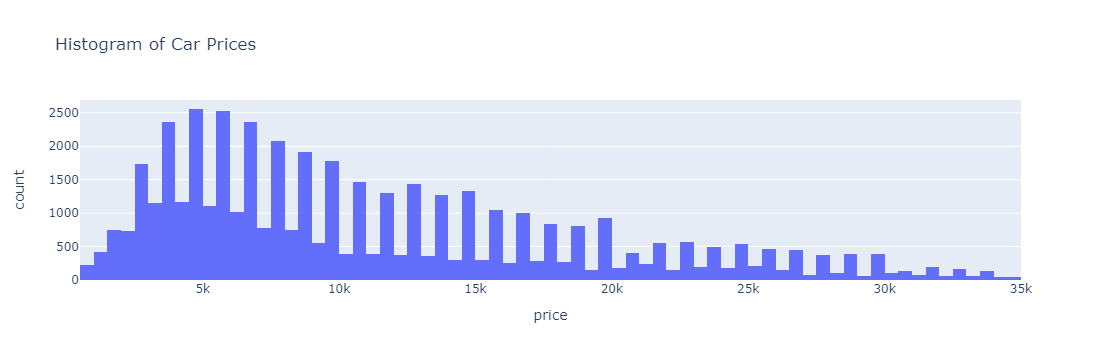

In [157]:
# Histogram of car prices
price_histogram = px.histogram(df, x='price', title='Histogram of Car Prices')
price_histogram.show()


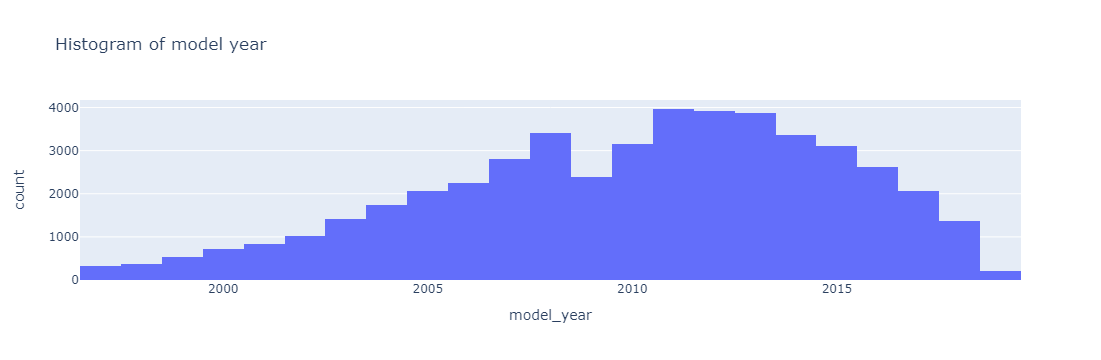

In [158]:
# Histogram of model_year
odometer_histogram = px.histogram(df, x='model_year', title='Histogram of model year')
odometer_histogram.show()

### Scatterplots <a id='scatterplots'></a>

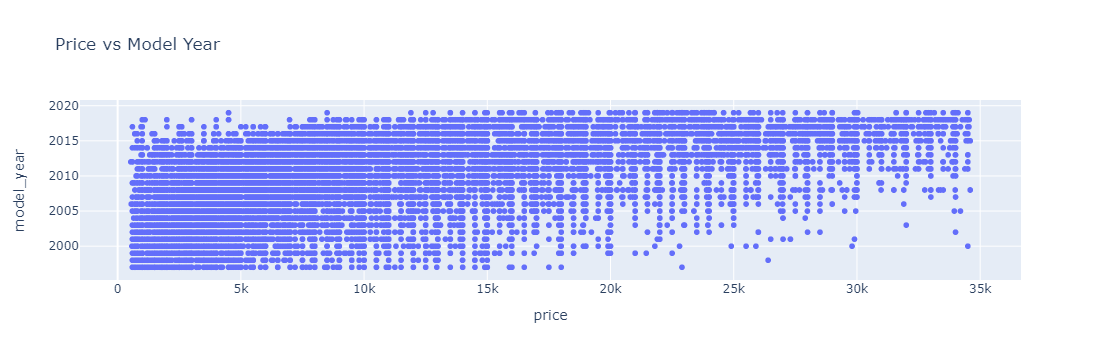

In [159]:
# Scatterplot showing the relationship between price and model year
price_model_year_scatter = px.scatter(df, x='price', y='model_year', title='Price vs Model Year')
price_model_year_scatter.show()

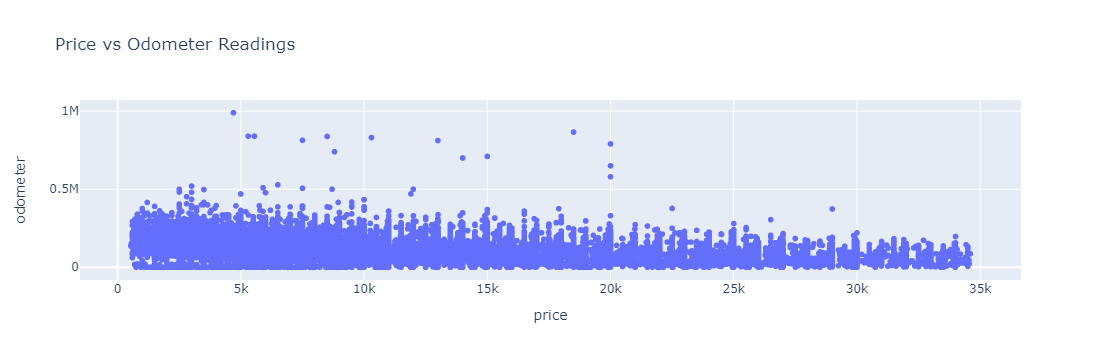

In [160]:
# Scatterplot showing the relationship between price and odometer readings
price_odometer_scatter = px.scatter(df, x='price', y='odometer', title='Price vs Odometer Readings')
price_odometer_scatter.show()


## Conclusion <a id='conclusion'></a>

Based on the results presented in the general conclusion of the notebook, several key insights can be inferred:

Distribution of Car Prices: The first histogram displays the distribution of car prices. From this visualization, one can infer the range of prices at which most cars are listed, as well as any outliers or unusual patterns in pricing. The most cars are presented in the range of 4500 - 4999 dollars.

Distribution of Vehicles by Model Year: The second histogram shows the distribution of vehicles based on their model year. This visualization allows one to understand the age distribution of the cars in the dataset and identify any trends or patterns related to the model year. The most popular models presented in the dataset are from the years 2011-2012.

Relationship between Price and Model Year: The first scatterplot illustrates the relationship between price and model year. By examining this plot, one can infer whether there's any correlation between the age of the car (model year) and its price. For example, if newer cars tend to be more expensive, or if there's a wide range of prices within each model year.

Relationship between Price and Odometer Readings: The second scatterplot demonstrates the relationship between price and odometer readings. This visualization helps in understanding whether there's a correlation between the mileage of the car (odometer readings) and its price. It can reveal if lower mileage tends to correlate with higher prices, or if there's a wide variation in pricing regardless of mileage.

Overall, these visualizations provide insights into the distribution of car prices, the age distribution of vehicles, and the relationships between price, model year, and odometer readings. They can help in identifying patterns, trends, and potential factors influencing the pricing of cars in the dataset.e dataset.